In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

Data collection

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
gender=pd.read_csv("gender_submission.csv")
whole_test=test.merge(gender , on="PassengerId" )
data=pd.concat([train , whole_test])
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Explorating data analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


modifing wrong data types

In [4]:
data.PassengerId=data.PassengerId.astype("object")
data.Survived=data.Survived.astype("object")
data.Pclass=data.Pclass.astype("object")


numerical features

In [5]:
numerical =[col for col in data.columns if data[col].dtype!="object"]
numerical

['Age', 'SibSp', 'Parch', 'Fare']

relation with y

In [6]:
pd.pivot_table(data, index="Survived" ,values= numerical  , aggfunc=["mean"])

mean                               
                Age       Fare     Parch     SibSp
Survived                                          
0         30.510986  23.879124  0.311656  0.496933
1         28.931079  48.811497  0.506073  0.502024

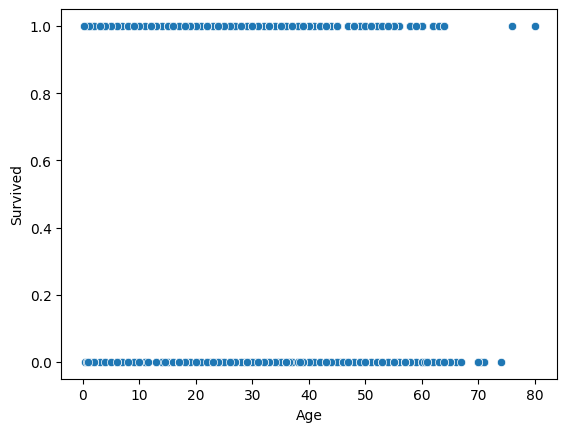

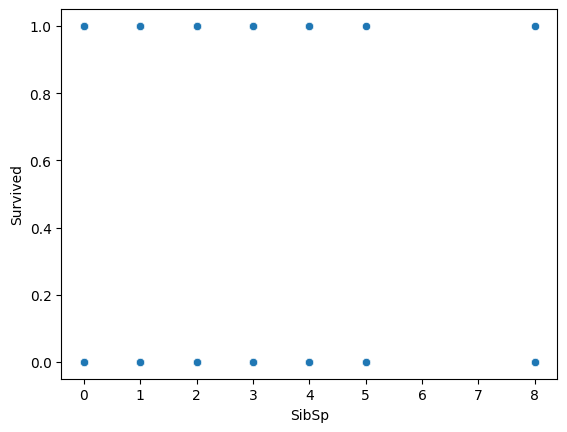

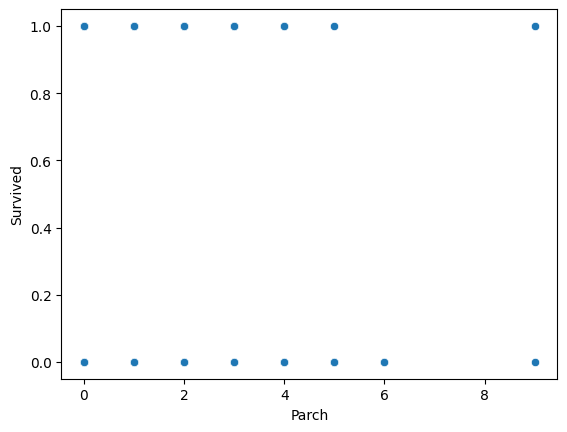

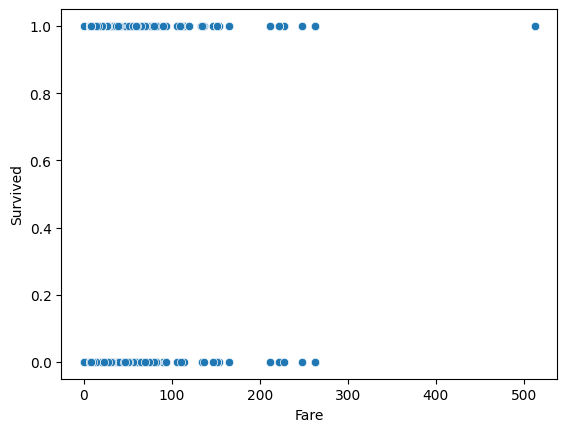

In [7]:
for col in numerical:
    sns.scatterplot(x=col, y="Survived", data=data)
    plt.show()  # Display each scatterplot

clean 

In [8]:
data.describe()

,Age,SibSp,Parch,Fare
count,1046.000000,1309.000000,1309.000000,1308.000000
mean,29.881138,0.498854,0.385027,33.295479
std,14.413493,1.041658,0.865560,51.758668
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


In [9]:
#print (data[data["Fare"] == 0].count())
data=data[data["Fare"] > 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1291 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1291 non-null   object 
 1   Survived     1291 non-null   object 
 2   Pclass       1291 non-null   object 
 3   Name         1291 non-null   object 
 4   Sex          1291 non-null   object 
 5   Age          1037 non-null   float64
 6   SibSp        1291 non-null   int64  
 7   Parch        1291 non-null   int64  
 8   Ticket       1291 non-null   object 
 9   Fare         1291 non-null   float64
 10  Cabin        291 non-null    object 
 11  Embarked     1289 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 131.1+ KB


In [10]:
data.describe()

,Age,SibSp,Parch,Fare
count,1037.000000,1291.000000,1291.000000,1291.000000
mean,29.797657,0.505809,0.390395,33.733917
std,14.405549,1.047221,0.870374,51.956349
min,0.170000,0.000000,0.000000,3.170800
25%,21.000000,0.000000,0.000000,7.925000
50%,28.000000,0.000000,0.000000,14.500000
75%,39.000000,1.000000,0.000000,31.331250
max,80.000000,8.000000,9.000000,512.329200


<Axes: >

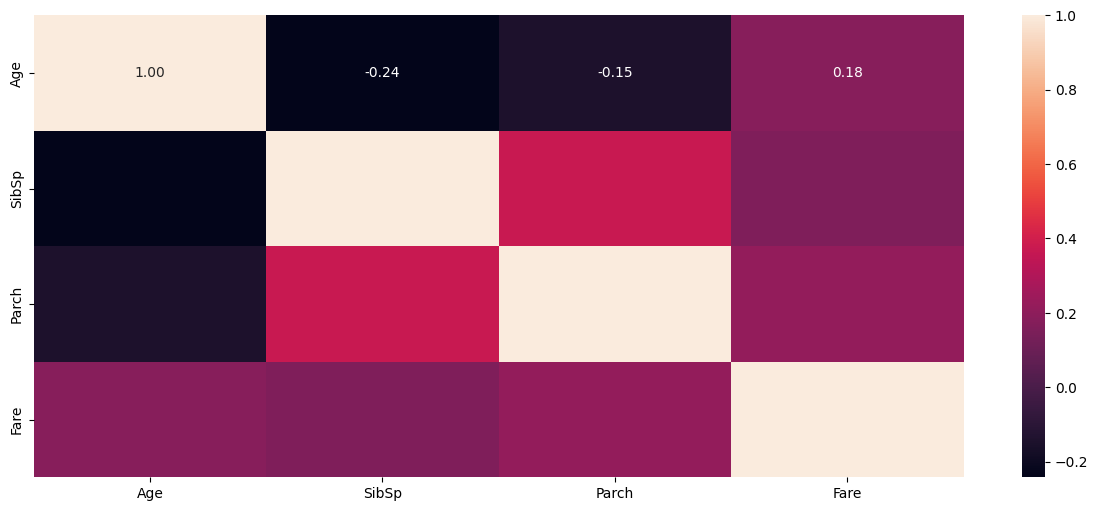

In [11]:
plt.figure(figsize=(15,6))
sns.heatmap(data[numerical].corr(),annot=True , fmt=".2f")

distribution

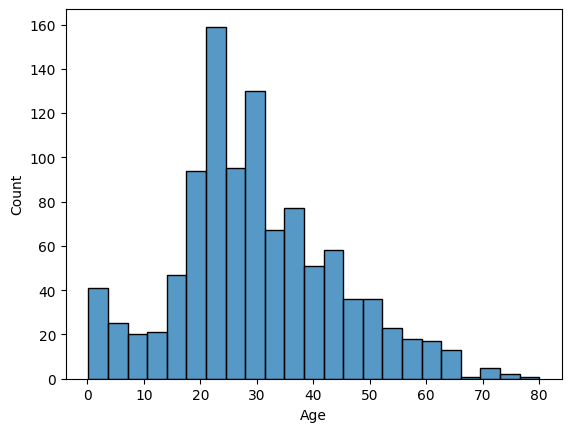

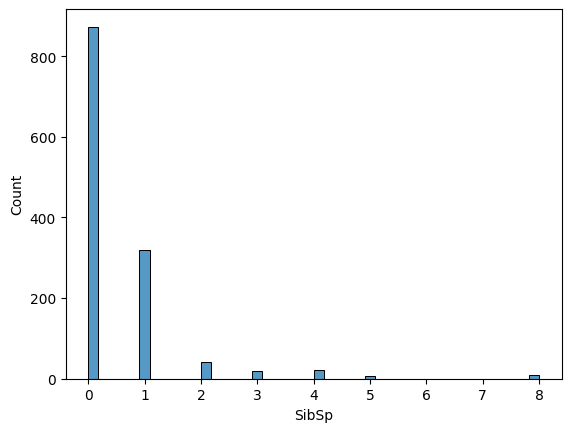

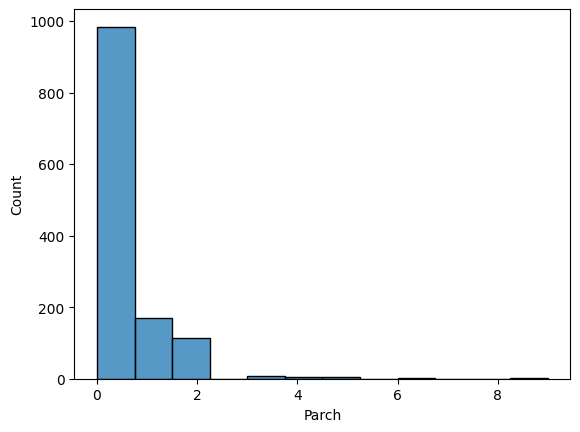

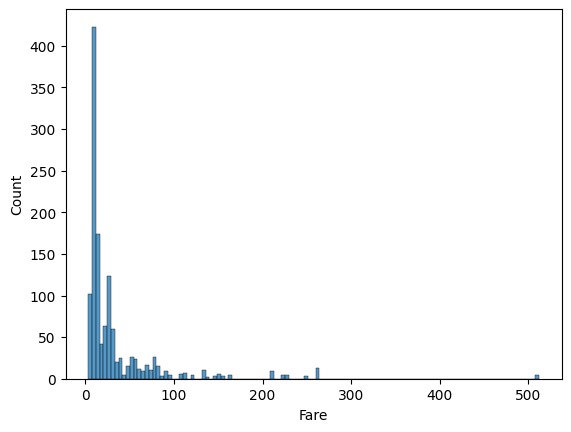

In [12]:
for col in numerical:
    sns.histplot(data[col])
    plt.show()  # Display each scatterplot

C:\Users\User\AppData\Local\Temp\ipykernel_5880\3917761096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Fare=np.log(data.Fare+0.0000001)


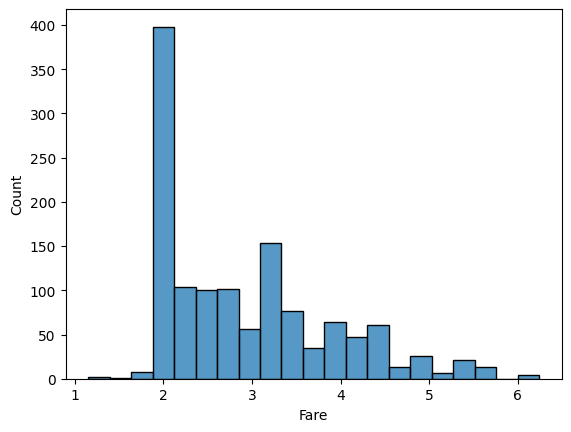

In [13]:
data.Fare=np.log(data.Fare+0.0000001)
sns.histplot(data.Fare)
plt.show()


categorical data

In [14]:
categorical=[col for col in data.columns if data[col].dtype=="object"]
categorical

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Ticket',
 'Cabin',
 'Embarked']

In [15]:
for col in categorical :
    print (col , data[col].nunique())
    

PassengerId 1291
Survived 2
Pclass 3
Name 1289
Sex 2
Ticket 917
Cabin 182
Embarked 3


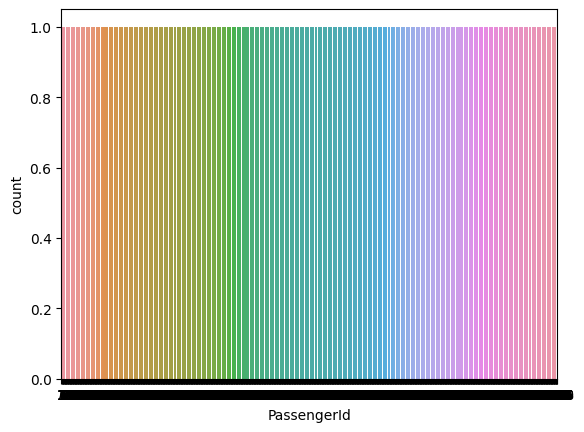

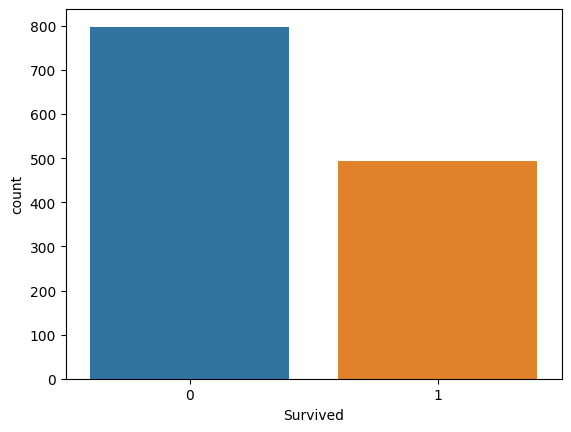

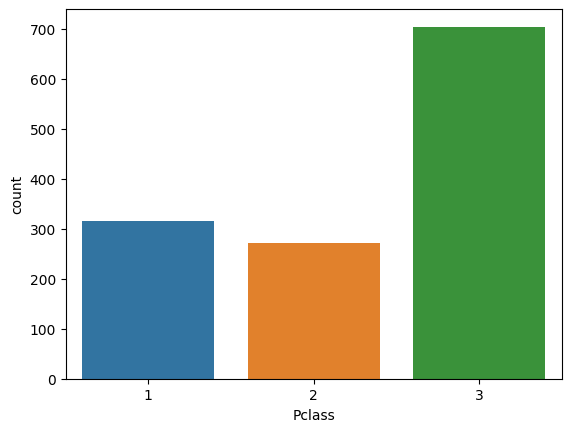

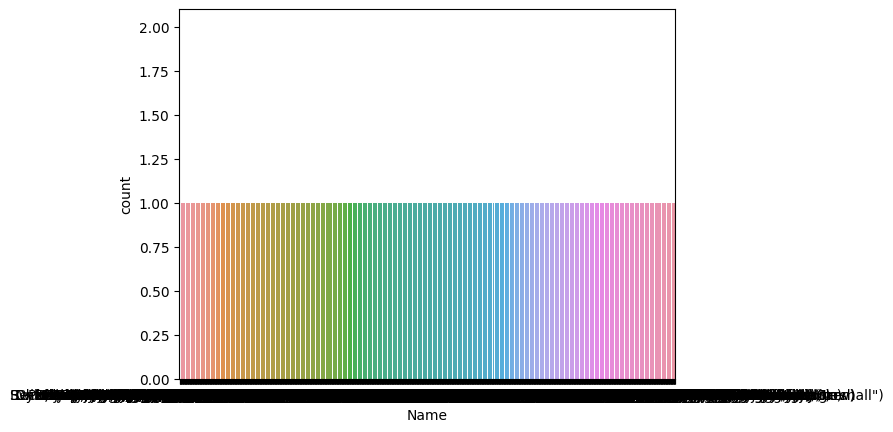

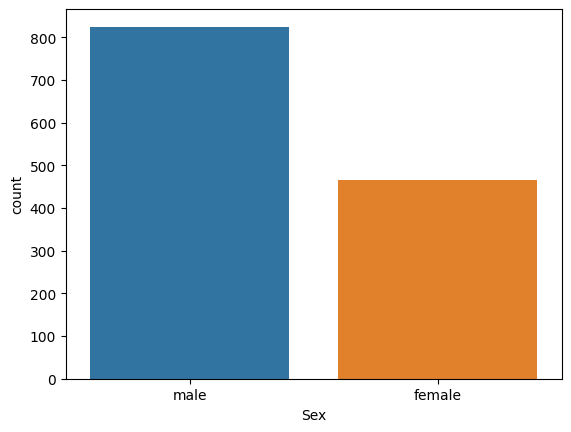

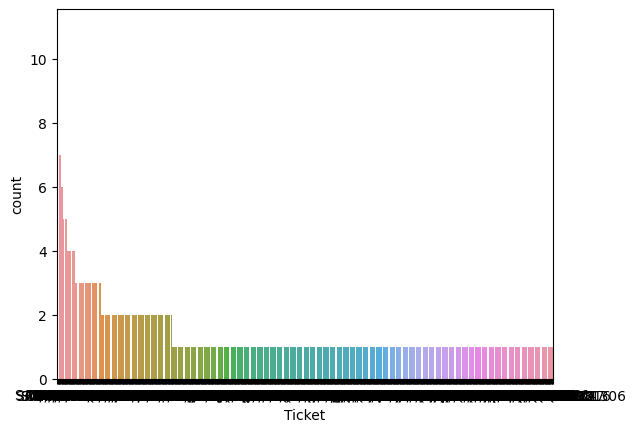

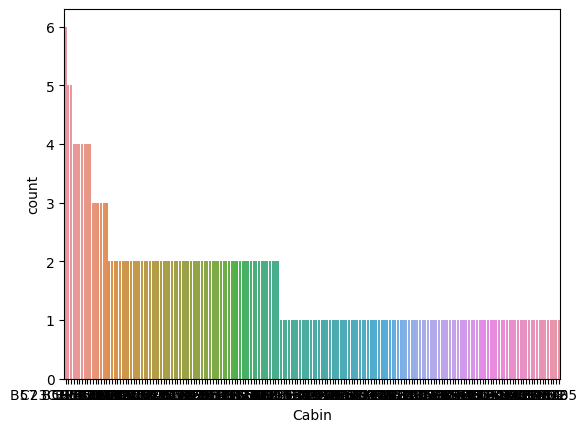

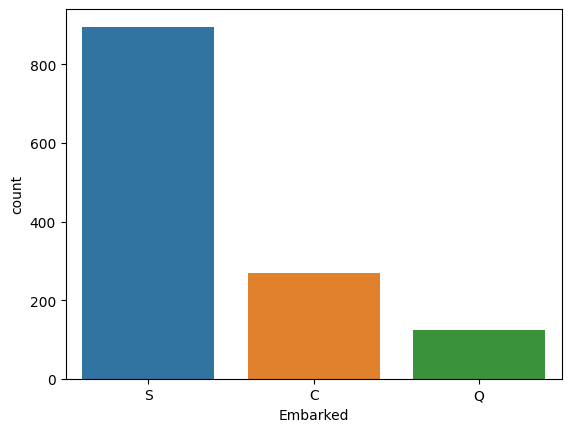

In [16]:
for i in categorical:
    sns.barplot(data =data,x =data[i].value_counts().index,y = data[i].value_counts())
    plt.show()

In [17]:
for i in categorical:
    data_group = data.groupby(i).Survived.agg(["mean"])
    display(data_group)

,mean
PassengerId,
1,0.0
2,1.0
3,1.0
4,1.0
5,0.0
...,...
1305,0.0
1306,1.0
1307,0.0


,mean
Survived,
0,0.0
1,1.0


,mean
Pclass,
1,0.588608
2,0.431734
3,0.269886


,mean
Name,
"Abbing, Mr. Anthony",0.0
"Abbott, Master. Eugene Joseph",0.0
"Abbott, Mr. Rossmore Edward",0.0
"Abbott, Mrs. Stanton (Rosa Hunt)",1.0
"Abelseth, Miss. Karen Marie",1.0
...,...
"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",1.0
"van Billiard, Master. James William",0.0
"van Billiard, Master. Walter John",0.0


,mean
Sex,
female,0.82618
male,0.130909


,mean
Ticket,
110152,1.0
110413,0.666667
110465,0.0
110469,0.0
110489,0.0
...,...
W./C. 6608,0.0
W./C. 6609,0.0
W.E.P. 5734,0.5


,mean
Cabin,
A10,0.0
A11,1.0
A14,0.0
A16,1.0
A18,0.0
...,...
F33,1.0
F38,0.0
F4,1.0


,mean
Embarked,
C,0.492593
Q,0.439024
S,0.339286


Feature Enginnering

In [18]:
cabin = data.Cabin

if multiple cabins have effect on survivng ratio ?

In [19]:
data["multiple_cabin"] = data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))

C:\Users\User\AppData\Local\Temp\ipykernel_5880\3654853240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["multiple_cabin"] = data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))


In [20]:
data.multiple_cabin.value_counts()

multiple_cabin
0    1000
1     251
2      26
3       9
4       5
Name: count, dtype: int64

In [21]:
data_group = data.groupby("multiple_cabin").Survived.agg(["mean"])
display(data_group)

,mean
multiple_cabin,
0,0.313
1,0.629482
2,0.5
3,0.666667
4,0.6


In [22]:
data["cabin_class"] = data.Cabin.apply(lambda x: str(x)[0])

C:\Users\User\AppData\Local\Temp\ipykernel_5880\1797618435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cabin_class"] = data.Cabin.apply(lambda x: str(x)[0])


In [23]:
data.cabin_class.value_counts()

cabin_class
n    1000
C      94
B      62
D      46
E      41
A      21
F      21
G       5
T       1
Name: count, dtype: int64

if cabin class have effect on survivng ratio ?

In [24]:
data_group = data.groupby("cabin_class").Survived.agg(["mean"])
display(data_group)

,mean
cabin_class,
A,0.47619
B,0.709677
C,0.574468
D,0.652174
E,0.682927
F,0.52381
G,0.6
T,0.0
n,0.313


In [25]:
ticket = data.Ticket

In [26]:
data["numeric_ticket"] = data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

C:\Users\User\AppData\Local\Temp\ipykernel_5880\2110681314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["numeric_ticket"] = data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)


In [27]:
data.numeric_ticket.value_counts()

numeric_ticket
1    943
0    348
Name: count, dtype: int64

In [28]:
data_group = data.groupby("numeric_ticket").Survived.agg(["mean"])
display(data_group)

,mean
numeric_ticket,
0,0.390805
1,0.378579


In [29]:
name = data.Name
data.Name.head(50)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [30]:
data["name_title"] = data.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())

C:\Users\User\AppData\Local\Temp\ipykernel_5880\3882715408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["name_title"] = data.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())


In [31]:
data["name_title"].value_counts()

name_title
Mr              740
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Dona              1
Name: count, dtype: int64

In [32]:
data_group = data.groupby("name_title").Survived.agg(["mean"])
display(data_group)

,mean
name_title,
Capt,0.0
Col,0.25
Don,0.0
Dona,1.0
Dr,0.375
Lady,1.0
Major,0.5
Master,0.377049
Miss,0.788462


In [33]:
data.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                254
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin             1000
Embarked             2
multiple_cabin       0
cabin_class          0
numeric_ticket       0
name_title           0
dtype: int64

In [34]:
data.Age.fillna(data.Age.mean(),inplace=True)
data.dropna(subset=["Embarked","Fare"],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_5880\1897294391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Age.fillna(data.Age.mean(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_5880\1897294391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=["Embarked","Fare"],inplace=True)


In [35]:
data.drop(["PassengerId","Name","Ticket","Cabin","numeric_ticket"], axis = 1,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_5880\831807528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(["PassengerId","Name","Ticket","Cabin","numeric_ticket"], axis = 1,inplace=True)


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1289 entries, 0 to 417
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        1289 non-null   object 
 1   Pclass          1289 non-null   object 
 2   Sex             1289 non-null   object 
 3   Age             1289 non-null   float64
 4   SibSp           1289 non-null   int64  
 5   Parch           1289 non-null   int64  
 6   Fare            1289 non-null   float64
 7   Embarked        1289 non-null   object 
 8   multiple_cabin  1289 non-null   int64  
 9   cabin_class     1289 non-null   object 
 10  name_title      1289 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 120.8+ KB


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1289 entries, 0 to 417
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        1289 non-null   object 
 1   Pclass          1289 non-null   object 
 2   Sex             1289 non-null   object 
 3   Age             1289 non-null   float64
 4   SibSp           1289 non-null   int64  
 5   Parch           1289 non-null   int64  
 6   Fare            1289 non-null   float64
 7   Embarked        1289 non-null   object 
 8   multiple_cabin  1289 non-null   int64  
 9   cabin_class     1289 non-null   object 
 10  name_title      1289 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 120.8+ KB


In [38]:
X = data.drop("Survived",axis=1)
y = data["Survived"]

In [39]:
y = y.astype("int32")

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1289 entries, 0 to 417
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          1289 non-null   object 
 1   Sex             1289 non-null   object 
 2   Age             1289 non-null   float64
 3   SibSp           1289 non-null   int64  
 4   Parch           1289 non-null   int64  
 5   Fare            1289 non-null   float64
 6   Embarked        1289 non-null   object 
 7   multiple_cabin  1289 non-null   int64  
 8   cabin_class     1289 non-null   object 
 9   name_title      1289 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 110.8+ KB


In [41]:
X.multiple_cabin = X.multiple_cabin.astype("object")

In [42]:
categorical = [col for col in X.columns if X[col].dtype == "object"]
for i in categorical:
    print(X[i].nunique())

3
2
3
5
9
17


In [43]:
X.info()
categorical

<class 'pandas.core.frame.DataFrame'>
Index: 1289 entries, 0 to 417
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          1289 non-null   object 
 1   Sex             1289 non-null   object 
 2   Age             1289 non-null   float64
 3   SibSp           1289 non-null   int64  
 4   Parch           1289 non-null   int64  
 5   Fare            1289 non-null   float64
 6   Embarked        1289 non-null   object 
 7   multiple_cabin  1289 non-null   object 
 8   cabin_class     1289 non-null   object 
 9   name_title      1289 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 110.8+ KB


['Pclass', 'Sex', 'Embarked', 'multiple_cabin', 'cabin_class', 'name_title']

In [44]:
X[categorical] = X[categorical].astype(str)
X = pd.get_dummies(X, columns=categorical)

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1289 entries, 0 to 417
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1289 non-null   float64
 1   SibSp                    1289 non-null   int64  
 2   Parch                    1289 non-null   int64  
 3   Fare                     1289 non-null   float64
 4   Pclass_1                 1289 non-null   bool   
 5   Pclass_2                 1289 non-null   bool   
 6   Pclass_3                 1289 non-null   bool   
 7   Sex_female               1289 non-null   bool   
 8   Sex_male                 1289 non-null   bool   
 9   Embarked_C               1289 non-null   bool   
 10  Embarked_Q               1289 non-null   bool   
 11  Embarked_S               1289 non-null   bool   
 12  multiple_cabin_0         1289 non-null   bool   
 13  multiple_cabin_1         1289 non-null   bool   
 14  multiple_cabin_2         1289 

In [46]:
X.isnull().sum()

Age                        0
SibSp                      0
Parch                      0
Fare                       0
Pclass_1                   0
Pclass_2                   0
Pclass_3                   0
Sex_female                 0
Sex_male                   0
Embarked_C                 0
Embarked_Q                 0
Embarked_S                 0
multiple_cabin_0           0
multiple_cabin_1           0
multiple_cabin_2           0
multiple_cabin_3           0
multiple_cabin_4           0
cabin_class_A              0
cabin_class_B              0
cabin_class_C              0
cabin_class_D              0
cabin_class_E              0
cabin_class_F              0
cabin_class_G              0
cabin_class_T              0
cabin_class_n              0
name_title_Capt            0
name_title_Col             0
name_title_Don             0
name_title_Dona            0
name_title_Dr              0
name_title_Lady            0
name_title_Major           0
name_title_Master          0
name_title_Mis

In [47]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [48]:
model = LogisticRegression()
CV  = cross_val_score(model, X_scaled,y,cv= 5)
print(CV)
print(CV.mean())

[0.81395349 0.81395349 0.78294574 0.89922481 0.94941634]
0.8518987723584592


In [49]:
model = DecisionTreeClassifier(max_depth=3)
CV  = cross_val_score(model, X_scaled,y,cv= 5)
print(CV)
print(CV.mean())

[0.8255814  0.81395349 0.80620155 0.91085271 0.9766537 ]
0.8666485687569752
